# DATA ANALYSIS

## 1. Ý nghĩa của thuộc tính:
- **Country**: Tên quốc gia
- Total Cases: Tổng số ca nhiễm
- New Cases: Số ca nhiễm mới
- Total Deaths: Tổng số ca tử vong
- New Deaths: Số ca tử vong mới
- Total Recovered: Tổng số ca hồi phục
- New Recovered: Số ca hồi phục mới
- Active Cases: Tổng số ca đang điều trị
- Serious, Critical: Số ca nghiêm trọng, nguy kịch
- Tot Cases/1M pop: Số ca nhiễm trên 1 triệu dân
- Deaths/1M pop: Số ca tử vong trên 1 triệu dân
- Total tests: Tổng số lần test
- Tests/1M pop: Số lần test trên 1 triệu dân
- Population: Dân số
- Continent: Châu lục
- 1 Case every X ppl: 1 ca nhiễm trên X dân
- 1 Death every X ppl: 1 ca tử vong trên X dân
- 1 Test every X ppl: 1 lần test trên X dân
- New Cases/1M pop: Số ca nhiễm mới trên 1 triệu dân
- New Deaths/1M pop: Số ca tử vong mới trên 1 triệu dân
- Active Cases/1M pop: Số ca đang điều trị trên 1 triệu dân

## 2. Phân tích các mối quan hệ nhờ trực quan

In [35]:
# Import thư viện: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
# Đọc dữ liệu:
covid_df = pd.read_csv('../data/modified/Modified_March_06_2023_corona_data.csv')
covid_df.head(5)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,...,Total tests,Tests/1M pop,Population,Continent,1 Case every X ppl,1 Death every X ppl,1 Test every X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,USA,105396817.0,0.0,1146740.0,0.0,102864696.0,0.0,1385381.0,2726.0,314800.0,...,1.167686e+09,3487657.0,3.348053e+08,North America,3.0,292.0,0.0,0.0,0.0,4138.0
1,India,44688101.0,0.0,530775.0,0.0,44154425.0,0.0,2901.0,0.0,31770.0,...,9.191891e+08,653468.0,1.406632e+09,Asia,31.0,2650.0,2.0,0.0,0.0,2.0
2,France,39638159.0,0.0,165030.0,0.0,39400459.0,706.0,72670.0,869.0,604383.0,...,2.714902e+08,4139547.0,6.558452e+07,Europe,2.0,397.0,0.0,0.0,0.0,1108.0
3,Germany,38210850.0,0.0,168397.0,0.0,37767300.0,17500.0,275153.0,0.0,455522.0,...,1.223324e+08,1458359.0,8.388360e+07,Europe,2.0,498.0,1.0,0.0,0.0,3280.0
4,Brazil,37076053.0,0.0,699276.0,0.0,36249161.0,0.0,127616.0,0.0,172164.0,...,6.377617e+07,296146.0,2.153536e+08,South America,6.0,308.0,3.0,0.0,0.0,593.0


### 2.1 Biểu đồ: 

#### 1. Mối quan hệ xoay quanh trường dữ liệu `Total Deaths` (Tổng số ca tử vong) và `Total Cases` (Tổng số ca nhiễm): 

#### 1.1 Top 3 quốc gia có tổng số ca tử vong nhiều nhất và trong đó quốc gia nào bị ảnh hưởng sâu sắc nhất:
- **Trường dữ liệu được trực quan**:  `Total Deaths`
- **Biểu đồ sử dụng**: Pie Chart.
- **Tính phù hợp của biểu đồ**: Để dễ dàng so sánh top 3 quốc gia có tổng ca tử vong nhiều nhất, pie chart là một biểu đồ phù hợp vì việc so sánh được thể hiện rõ tỉ lệ phần trăm của 3 quốc gia (các giá trị rời rạc). 
- **Mục đích của câu hỏi:** Để xem top 3 quốc gia có số ca tử vong nhiều nhất và trong đó nước nào bị ảnh hưởng sâu sắc nhất trong đợt dịch Covid 19.

In [43]:
# Group the data by country and sum the number of deaths
deaths_by_country = covid_df.groupby('Country')['Total Deaths'].sum()

# Sort the countries by the number of deaths in descending order
sorted_deaths_by_country = deaths_by_country.sort_values(ascending=False)

# Select the top 3 countries with the highest number of deaths
top_3_deaths_by_country = sorted_deaths_by_country[:3]

top_3_deaths_by_country

Country
USA       1146740.0
Brazil     699276.0
India      530775.0
Name: Total Deaths, dtype: float64

In [49]:
# Group the data by country and sum the number of total cases
cases_by_country = covid_df.groupby('Country')['Total Cases'].sum()

# Sort the countries by the number of total cases
sorted_cases_by_country = cases_by_country.sort_values(ascending=False)

# Select the top 5 countries with the highest number of total cases
top_5_cases_by_country = sorted_cases_by_country[:5]

top_5_cases_by_country

Country
USA        105396817.0
India       44688101.0
France      39638159.0
Germany     38210850.0
Brazil      37076053.0
Name: Total Cases, dtype: float64

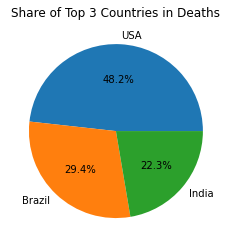

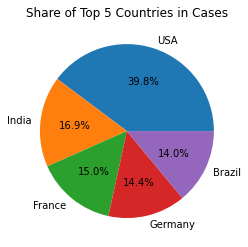

In [48]:
plt.pie(top_3_deaths_by_country, labels=top_3_deaths_by_country.index, autopct='%1.1f%%')
plt.title('Share of Top 3 Countries in Deaths')
plt.show()
plt.pie(top_5_cases_by_country, labels=top_5_cases_by_country.index, autopct='%1.1f%%')
plt.title('Share of Top 5 Countries in Cases')
plt.show()

- **Nhận xét biểu đồ**: 
  - USA là quốc gia có số lượng tử vong nhiều nhất trong top 3. Điều này có thể được giải thích là do ban đầu Mỹ khá chủ quan trong việc phòng chống dịch bệnh Covid, Mỹ không bắt buộc đeo khẩu trang ở nơi công cộng thời đầu dịch. Hậu quả là số ca mắc tăng do miễn dịch cộng đồng không hiệu quả.
  
- **Quan hệ với các trường dữ liệu khác**: Nhìn tổng quan biểu đồ, số ca nhiễm của Mỹ, Ấn Độ và Brazil cũng có tổng số ca nhiễm cao trong top 5 nên cũng dễ hiểu tại sao 3 nước lại có tỷ lệ tử vong cao có nhiều yếu tố nữa nhưng đa phần là do quá tải cho nền y tế

#### 1.2 Vậy hậu đỉnh dịch thì bây giờ tổng số ca tử vong có tỉ lệ thuận với tổng số ca nhiễm không ?
- **Trường dữ liệu được trực quan**: `Total Cases`, `Total Deaths`.
- Scatter.
- **Tính phù hợp của biểu đồ**: Scatter là biểu đồ thông dụng nhất khi quan sát mối quan hệ của hai biến, đặc biệt là xem xét sự tương quan giữa hai biến đó. Với lý do như vậy nên sử dụng scatter plot cho câu hỏi xem xét liệu 2 biến `Total Cases` và `Total Deaths` có sự tương quan với nhau hay không là phù hợp.
- **Mục đích của câu hỏi:** Nhằm xem xét sự tương quan giữa tổng số ca nhiễm với tổng số ca tử vong theo châu lục. Nếu ca nhiễm giảm thì ca tử vong phải giảm, và ngược lại. Phân biệt theo châu lục vì mỗi châu lục có những điểm khác nhau về tập tính văn hóa nên phân biệt châu lục sẽ thấy được tương quan rõ nhất.

In [52]:
df = covid_df["Continent"].unique()

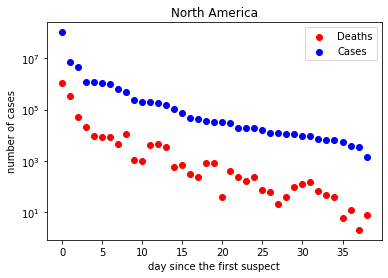

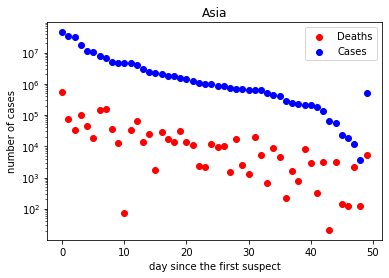

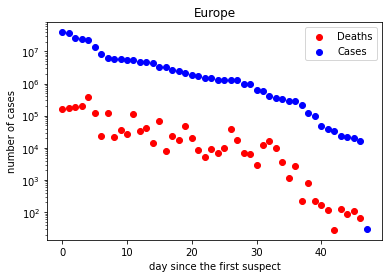

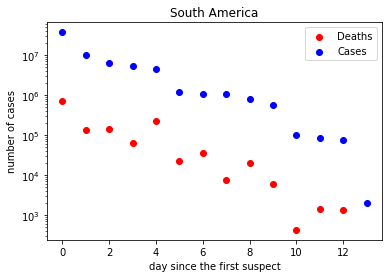

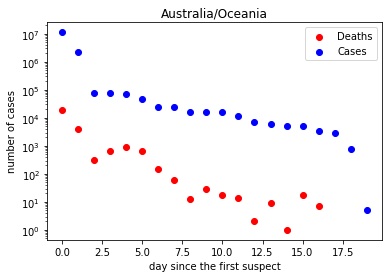

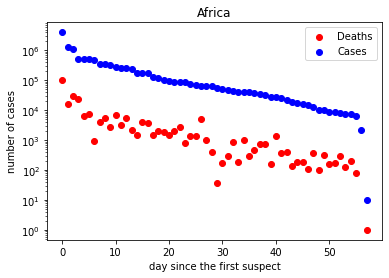

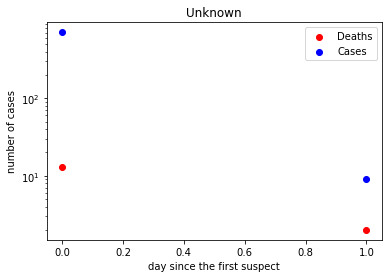

In [51]:
for idx in range(0,len(df)):
    c = covid_df[covid_df['Continent']==df[idx]].reset_index()
    plt.scatter(np.arange(0,len(c)),c['Total Deaths'],color='red',label='Deaths')
    plt.scatter(np.arange(0,len(c)),c['Total Cases'],color='blue',label='Cases')
    plt.title(df[idx])
    plt.xlabel('day since the first suspect')
    plt.ylabel('number of cases')
    plt.yscale("log")
    plt.legend()
    plt.show()

- **Nhận xét các biểu đồ:**
  - Qua biểu đồ, nhóm nhận thấy đa số tổng ca nhiễm ở các châu lục để giảm dần theo một đường đi xuống và tổng số ca tử vong cũng giảm thấy rõ ràng. Chứng minh rằng tình hình dịch đã được kiểm soát.
  - Nhìn chung, các quốc gia trên thế giới kiểm soát tình hình dịch rất tốt và ổn định, số ca mắc mới giảm dần, số ca phục hồi tăng lên. 
- **Mối quan hệ nhân quả:** Mối quan hệ suy ra ở đây là nếu các biện pháp phòng chống dịch bệnh được hiệu quả thì số ca tử vong giảm khi số ca mắc bệnh giảm.